In [17]:
# from magilearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# 线性回归模型评估

均方误差 (MSE): 222.0156
平均绝对误差 (MAE): 11.8231
决定系数 (R² Score): 0.9462


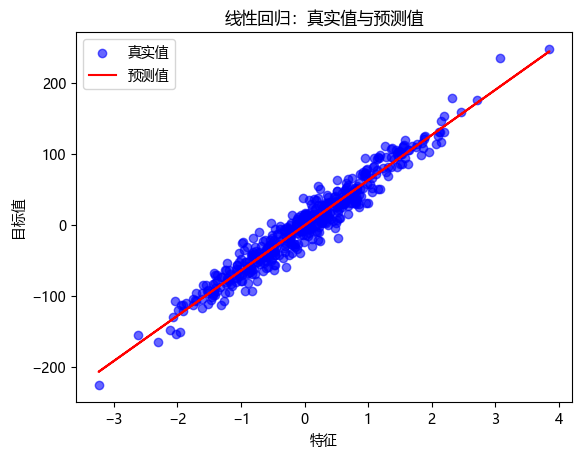

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 导入 LinearRegression 模型
from magilearn.models import LinearRegression

# 生成训练数据：500个样本，1个特征，增加噪声
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=42)

# 初始化并训练线性回归模型
lr = LinearRegression(learning_rate=0.01, n_iters=1000)
lr.fit(X, y)

# 在训练集上预测
y_pred = lr.predict(X)

# 评估模型
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"均方误差 (MSE): {mse:.4f}")
print(f"平均绝对误差 (MAE): {mae:.4f}")
print(f"决定系数 (R² Score): {r2:.4f}")

# 可视化真实值与预测值
plt.scatter(X, y, color='blue', label='真实值', alpha=0.6)  # 添加透明度让散点更明显
plt.plot(X, y_pred, color='red', label='预测值')
plt.title('线性回归：真实值与预测值')
plt.xlabel('特征')
plt.ylabel('目标值')
plt.legend()
plt.show()


# 逻辑回归模型评估

Accuracy: 0.8500
Precision: 0.8873
Recall: 0.8129
Confusion Matrix:
[[129  16]
 [ 29 126]]
ROC AUC Score: 0.9125


<Figure size 600x500 with 0 Axes>

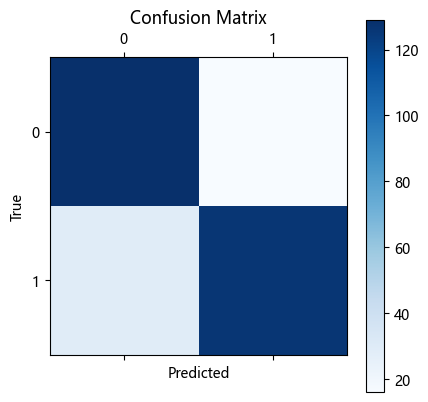

In [19]:
from magilearn.models import LogisticRegression
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, confusion_matrix, roc_auc_score, accuracy_score
)
import matplotlib.pyplot as plt

# 生成一个简单的二分类数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建并训练逻辑回归模型
lr = LogisticRegression(learning_rate=0.01, num_iterations=1000)
lr.fit(X_train, y_train)

# 预测测试集
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)  # 预测概率，用于 ROC AUC

# 评估模型
accuracy = accuracy_score(y_test, y_pred)  # 准确率
precision = precision_score(y_test, y_pred)  # 精确率
recall = recall_score(y_test, y_pred)  # 召回率
conf_matrix = confusion_matrix(y_test, y_pred)  # 混淆矩阵
roc_auc = roc_auc_score(y_test, y_pred_prob)  # ROC AUC 分数

# 输出评估结果
print(f"Accuracy: {accuracy:.4f}")  # 新增准确率输出
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# 可视化混淆矩阵
plt.figure(figsize=(6, 5))  # 创建一个新的图形窗口
plt.matshow(conf_matrix, cmap='Blues')  # 绘制混淆矩阵
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()


# 决策树模型评估

In [20]:
from magilearn.models import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 生成一个简单的二分类数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建并训练决策树分类器
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# 输出评估结果
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.8833
Precision: 0.9225
Recall: 0.8452
Confusion Matrix:
[[134  11]
 [ 24 131]]
ROC AUC Score: 0.8846


# 随机森林模型评估

In [21]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from magilearn.models import RandomForestClassifier  

# 生成训练数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化并训练随机森林模型
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=10, min_samples_split=2)
rf.fit(X_train, y_train)

# 在测试集上预测
y_pred = rf.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 为了计算 ROC AUC 分数，需要对标签进行二进制处理
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_bin, y_pred_bin)

# 输出评估结果
print("模型评估指标：")
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"混淆矩阵 (Confusion Matrix):\n{conf_matrix}")
print(f"ROC AUC 分数 (ROC AUC): {roc_auc:.4f}")


模型评估指标：
准确率 (Accuracy): 0.8667
精确率 (Precision): 0.8966
召回率 (Recall): 0.8387
混淆矩阵 (Confusion Matrix):
[[130  15]
 [ 25 130]]
ROC AUC 分数 (ROC AUC): 0.8676


# K-mean模型评估

轮廓系数 (Silhouette Score): 0.7911
聚类内部的均方误差 (WCSS): 948.8903
调整兰德指数 (ARI): 1.0000


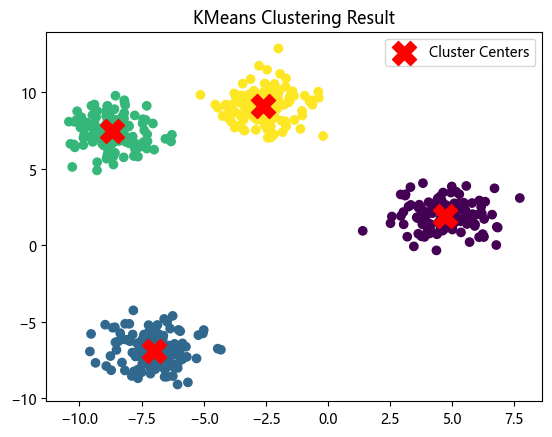

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.metrics import adjusted_rand_score

# 导入 KMeans 模型
from magilearn.models import KMeans

# 生成样本数据
X, y_true = make_blobs(n_samples=500, centers=4, random_state=42)

# 初始化并训练 KMeans 模型
kmeans = KMeans(n_clusters=4, max_iters=300, tol=1e-4, random_state=42)
kmeans.fit(X)

# 获取预测标签
y_pred = kmeans.predict(X)

# 评估模型
# 1. 轮廓系数 (Silhouette Score)
sil_score = silhouette_score(X, y_pred)
print(f"轮廓系数 (Silhouette Score): {sil_score:.4f}")

# 2. 聚类内部的均方误差 (WCSS)
distances = np.linalg.norm(X - kmeans.cluster_centers_[y_pred], axis=1)
wcss = np.sum(distances**2)
print(f"聚类内部的均方误差 (WCSS): {wcss:.4f}")

# 3. 调整兰德指数 (Adjusted Rand Index, ARI)
# 这里使用真实标签 y_true 来计算 ARI
ari_score = adjusted_rand_score(y_true, y_pred)
print(f"调整兰德指数 (ARI): {ari_score:.4f}")

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Cluster Centers')
plt.title('KMeans Clustering Result')
plt.legend()
plt.show()
